<a href="https://www.kaggle.com/code/easyice/e-d-a-and-profit-prediction-sales-dataset?scriptVersionId=238705475" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/Sales Dataset.csv


In [6]:
df = pd.read_csv("/kaggle/input/sales-dataset/Sales Dataset.csv")

### Data Summary.

In [7]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [8]:
df.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08
1193,B-25068,914,163,13,Office Supplies,Markers,UPI,2024-10-26,Andrea Hill,Illinois,Chicago,2024-10


In [9]:
df.shape

(1194, 12)

In [10]:
df.size

14328

In [11]:
df.ndim

2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [13]:
df.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [14]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

### Exploratory Data Analysis.

- ### Data Visualization.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Amount', ylabel='Count'>

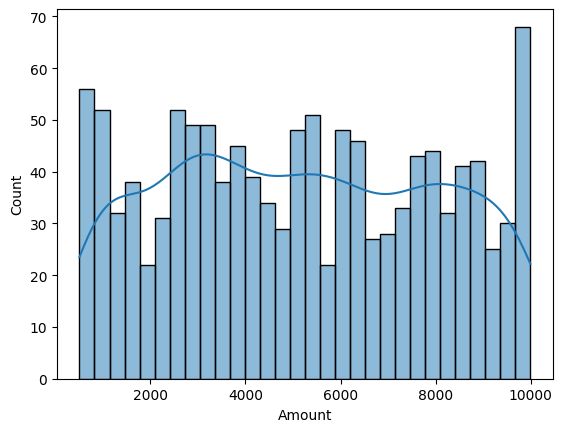

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x='Amount', kde=True, data=df, bins=30)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Profit', ylabel='Density'>

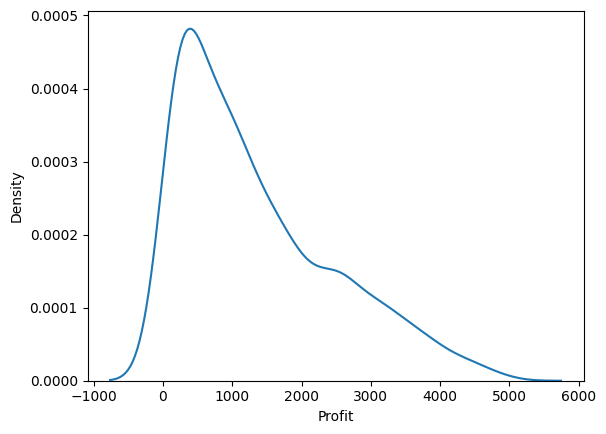

In [16]:
sns.kdeplot(x='Profit', data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


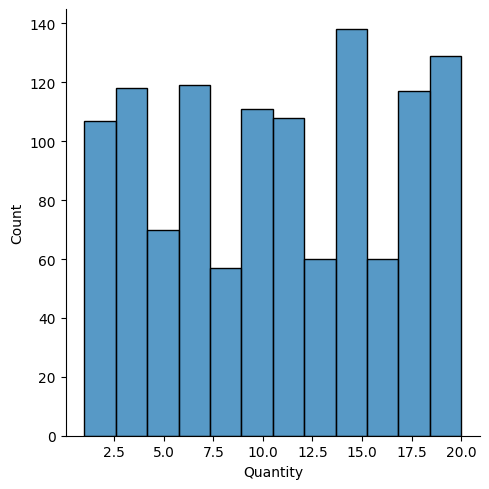

In [17]:
sns.displot(x='Quantity', data=df)

<Axes: xlabel='Amount', ylabel='Profit'>

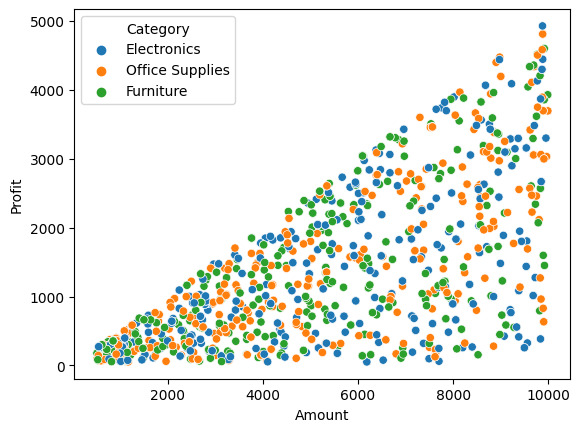

In [18]:
sns.scatterplot(x='Amount', y='Profit', hue='Category', data=df)

<Axes: xlabel='State', ylabel='Profit'>

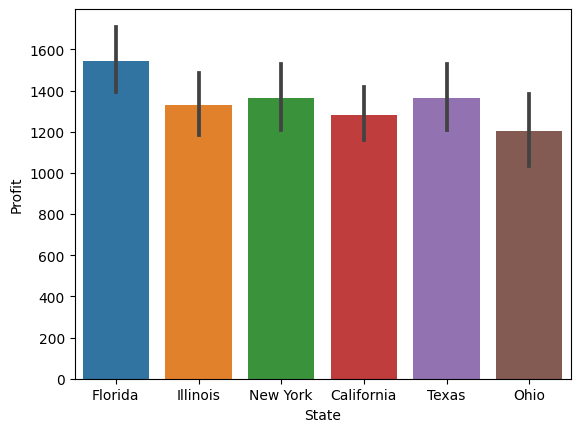

In [19]:
sns.barplot(x='State', y='Profit', data=df)

<Axes: xlabel='State', ylabel='Amount'>

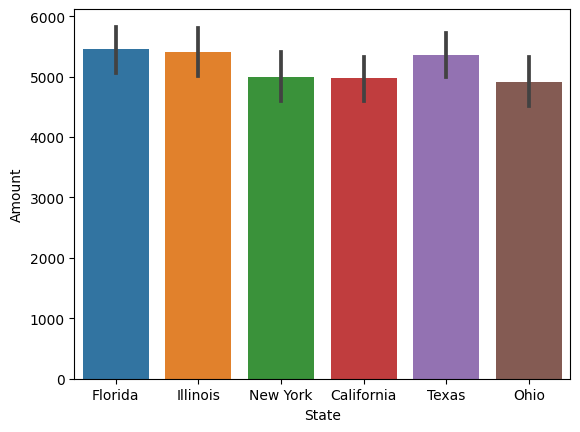

In [20]:
sns.barplot(x='State', y='Amount', data=df)


<Axes: xlabel='City', ylabel='Profit'>

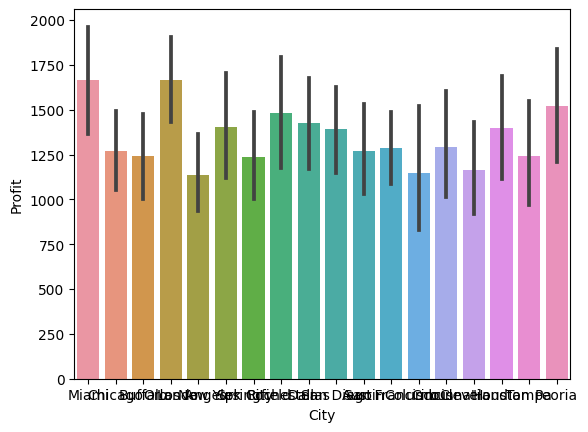

In [21]:
sns.barplot(x='City', y='Profit', data=df)

In [22]:
df.City.unique()

array(['Miami', 'Chicago', 'Buffalo', 'Orlando', 'Los Angeles',
       'New York City', 'Springfield', 'Rochester', 'Dallas', 'San Diego',
       'Austin', 'San Francisco', 'Columbus', 'Cincinnati', 'Cleveland',
       'Houston', 'Tampa', 'Peoria'], dtype=object)

Text(0.5, 1.0, 'Top 10 cities by profit.')

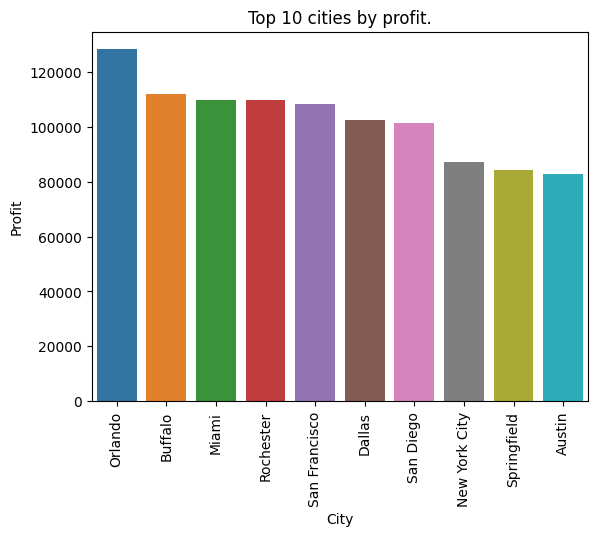

In [23]:
city_profit=df.groupby('City')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='City', y='Profit', data=city_profit.head(10))
plt.xticks(rotation=90)
plt.title("Top 10 cities by profit.")

In [24]:
df.isnull().sum().sum()

0

<Axes: xlabel='Category', ylabel='Profit'>

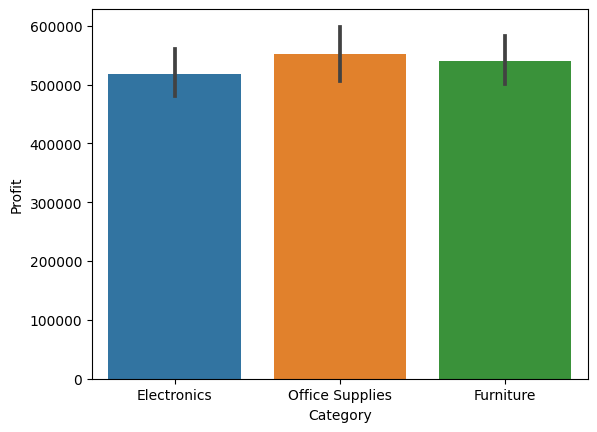

In [25]:
sns.barplot(x='Category', y='Profit', data=df, estimator="sum")

<Axes: xlabel='Sub-Category', ylabel='Profit'>

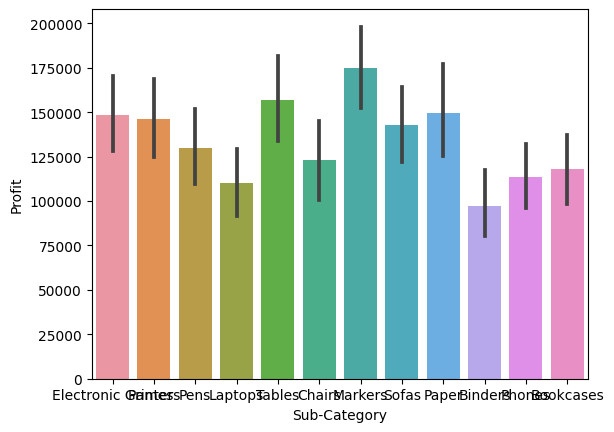

In [26]:
sns.barplot(x='Sub-Category', y='Profit', data=df, estimator="sum")

In [27]:
df['Sub-Category'].unique()

array(['Electronic Games', 'Printers', 'Pens', 'Laptops', 'Tables',
       'Chairs', 'Markers', 'Sofas', 'Paper', 'Binders', 'Phones',
       'Bookcases'], dtype=object)

Text(0.5, 1.0, 'Top 10 Sub-Categories by Profit')

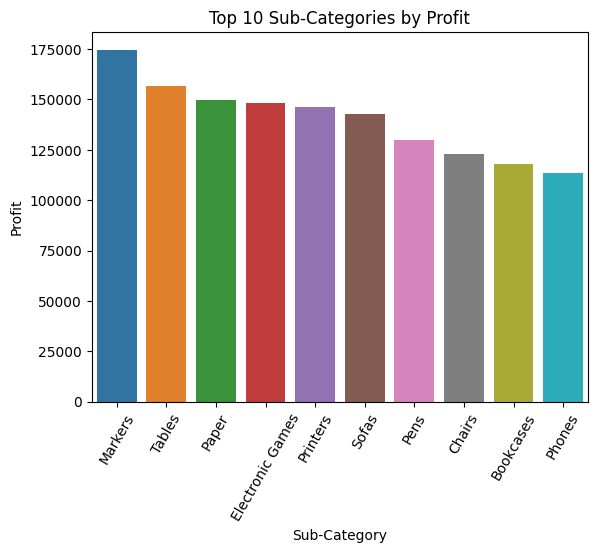

In [28]:
sub_cat_profit=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
sns.barplot(x='Sub-Category', y='Profit', data=sub_cat_profit.head(10))
plt.xticks(rotation=60)
plt.title("Top 10 Sub-Categories by Profit")

<Axes: xlabel='PaymentMode', ylabel='Amount'>

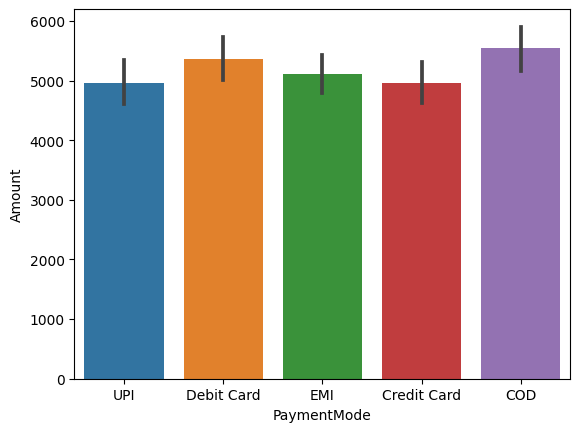

In [29]:
sns.barplot(x='PaymentMode', y='Amount', data=df)

In [30]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


/tmp/ipykernel_31/1963771323.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.year,y='Profit', data=df,ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Order Date', ylabel='Profit'>

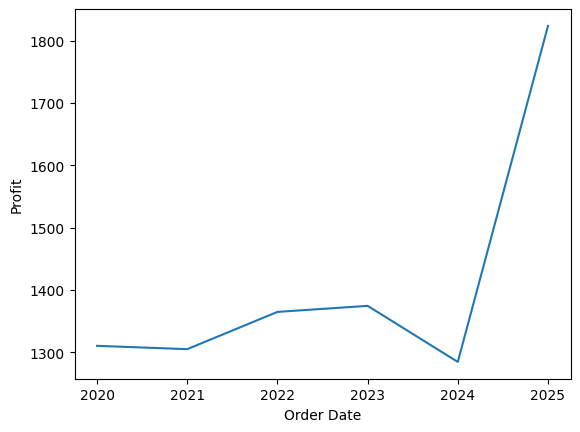

In [31]:
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.year,y='Profit', data=df,ci=None)

/tmp/ipykernel_31/2540091189.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.month, y='Profit', data=df, ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Order Date', ylabel='Profit'>

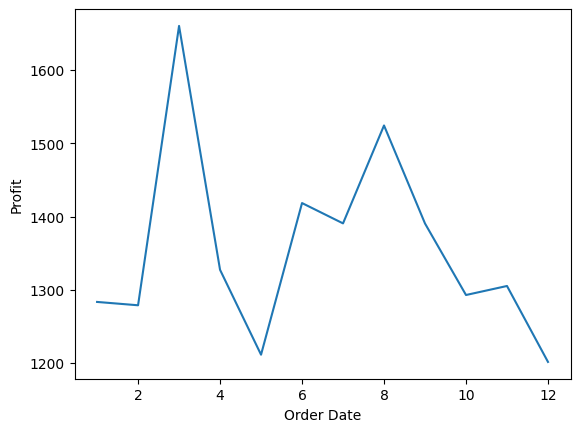

In [32]:
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.month, y='Profit', data=df, ci=None)

In [33]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Order Date', ylabel='Profit'>

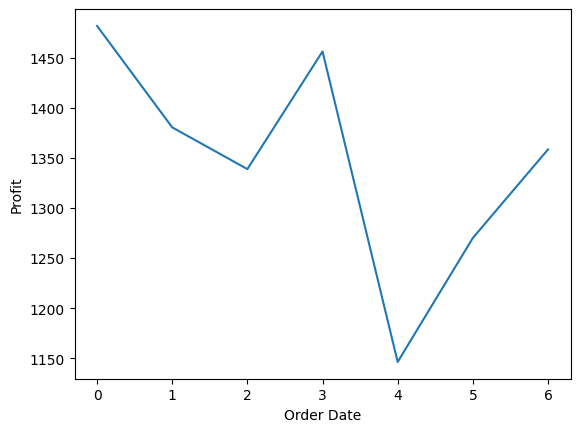

In [34]:
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.dayofweek,y='Profit', data=df, ci=None)

<Axes: xlabel='Order Date', ylabel='Profit'>

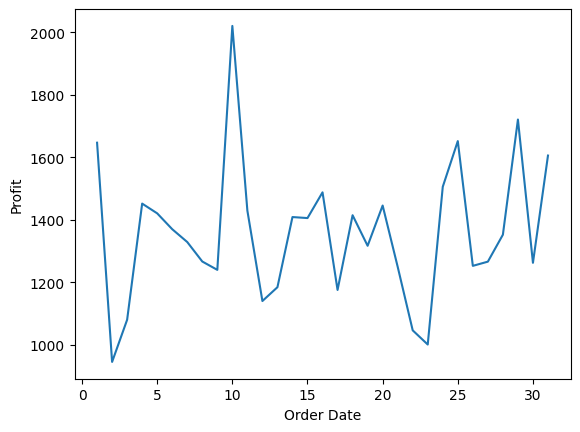

In [35]:
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.day, y='Profit', data=df, ci=None)

<Axes: xlabel='Order Date', ylabel='Profit'>

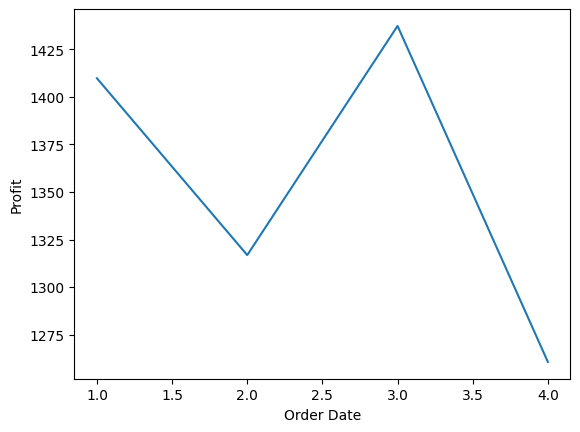

In [36]:
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.quarter, y='Profit', data=df, ci=None)

In [37]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


<Axes: xlabel='count', ylabel='City'>

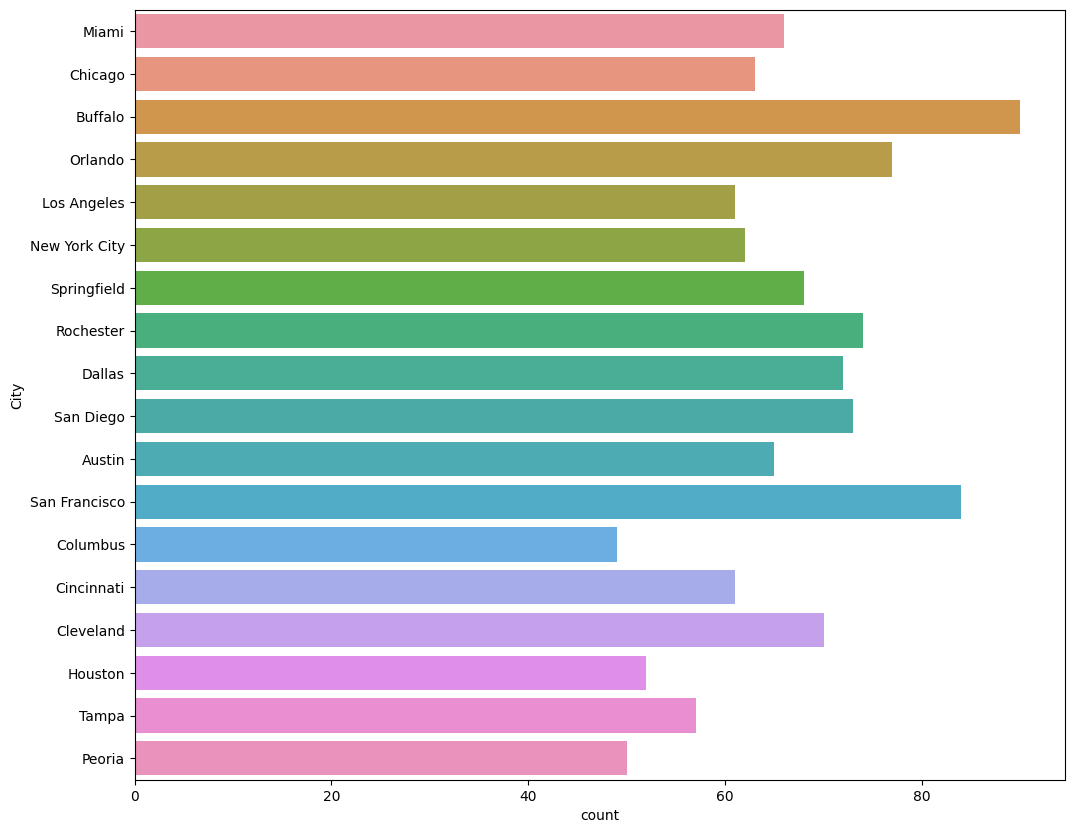

In [38]:
plt.figure(figsize=(12,10))
sns.countplot(y='City', data=df)

<Axes: xlabel='count', ylabel='Sub-Category'>

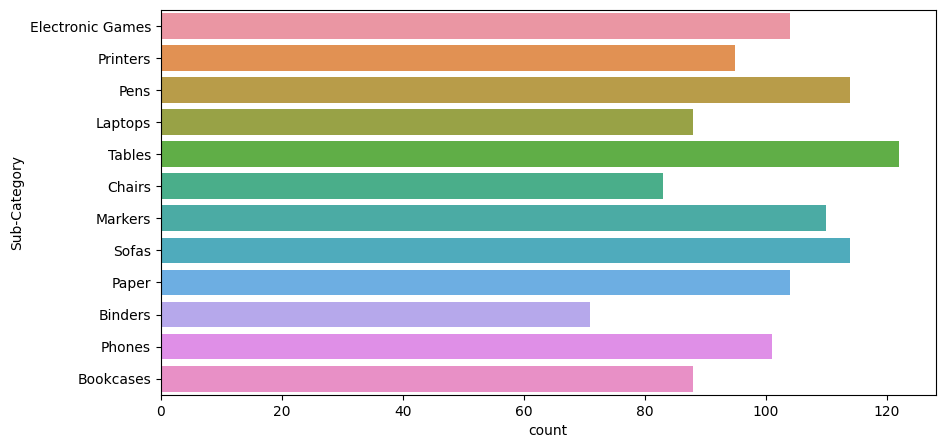

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(y='Sub-Category', data=df)

<Axes: xlabel='Category', ylabel='count'>

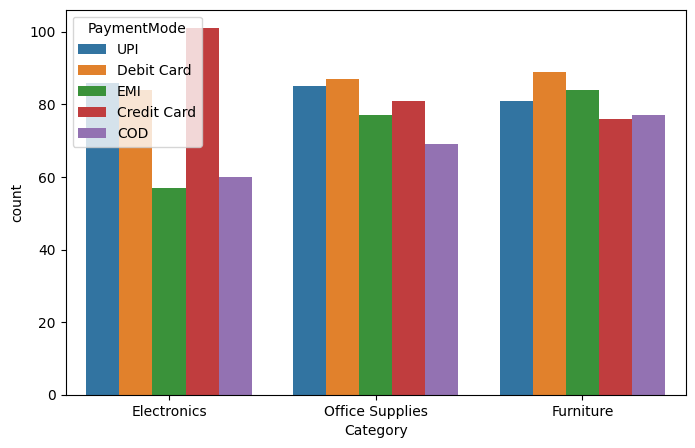

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category', hue='PaymentMode', data=df)

<Axes: ylabel='count'>

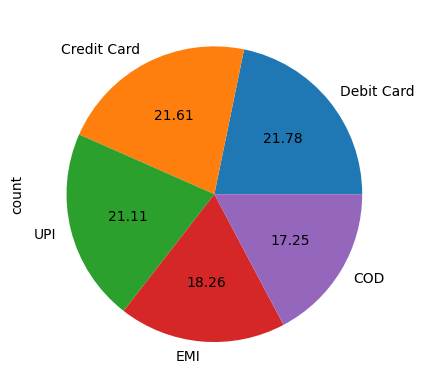

In [41]:
df['PaymentMode'].value_counts().plot(kind='pie', autopct='%.2f')

- ### Outliers Check.

<Axes: >

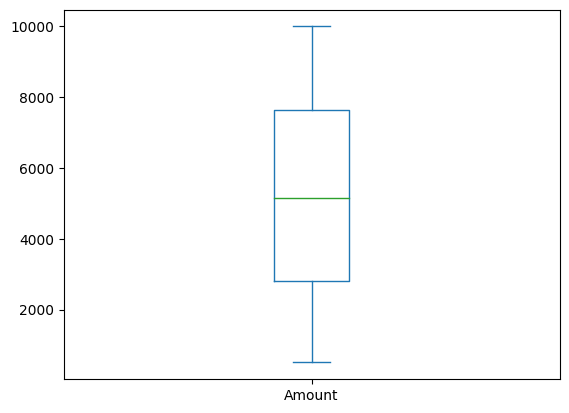

In [42]:
df['Amount'].plot(kind='box')

<Axes: >

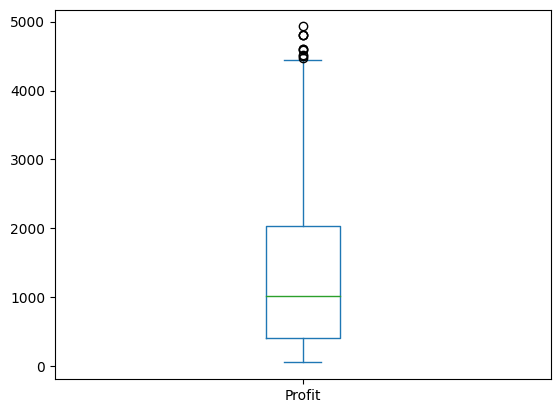

In [43]:
df['Profit'].plot(kind='box')

<Axes: >

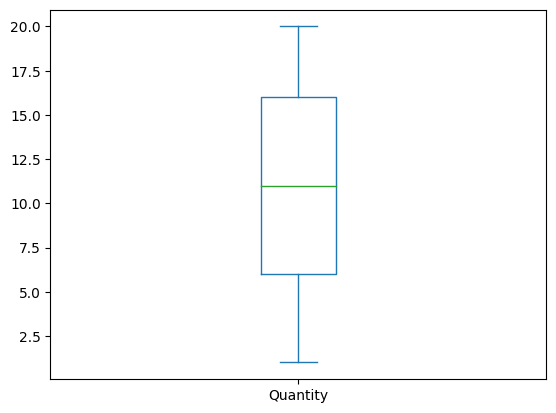

In [44]:
df['Quantity'].plot(kind='box')

<Axes: >

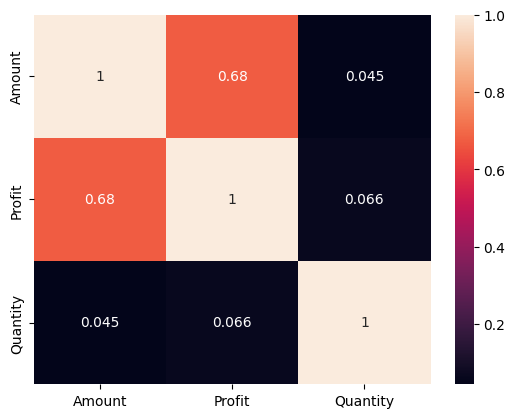

In [45]:
sns.heatmap(df[['Amount','Profit','Quantity']].corr(), annot=True)

### Profit Model.

In [46]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

In [47]:
model_data = df.drop(['Order ID','Order Date','CustomerName','Year-Month'], axis=1)

In [48]:
model_data.head()

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,State,City
0,9726,1275,5,Electronics,Electronic Games,UPI,Florida,Miami
1,9726,1275,5,Electronics,Electronic Games,UPI,Illinois,Chicago
2,9726,1275,5,Electronics,Electronic Games,UPI,New York,Buffalo
3,4975,1330,14,Electronics,Printers,UPI,Florida,Miami
4,4975,1330,14,Electronics,Printers,UPI,Illinois,Chicago


- ### Train Test Split.

In [49]:
# feature selection.
X = model_data.drop('Profit', axis=1)
y = model_data.Profit

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [51]:
# column Transformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[('tnf1', OneHotEncoder(sparse=False, drop='first'),
                    ['Category', 'Sub-Category', 'PaymentMode', 'State', 'City'])],
                               remainder = 'passthrough')

In [52]:
transformer.fit_transform(X_train).shape
X_train_new = transformer.fit_transform(X_train)

In [53]:
transformer.fit_transform(X_test).shape
X_test_new = transformer.fit_transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_new,y_train)

LinearRegression()

In [55]:
y_predict = LR.predict(X_test_new)
y_predict

array([ 5.81688679e+02,  5.64232395e+02,  1.80600752e+03,  1.27933215e+03,
        1.77701325e+03,  2.37414417e+02,  9.79184940e+02,  1.35823285e+03,
        2.31045155e+03,  1.06844041e+03,  1.46243113e+03,  1.98591685e+03,
        7.15758968e+02,  1.77443370e+03,  2.88575233e+02, -7.01608582e+01,
        9.66218182e+02,  2.10753128e+03,  9.01083378e+02,  1.47083612e+03,
        4.25803368e+02,  5.28014370e+02,  1.04813214e+03,  1.02306322e+03,
        2.81713304e+03,  2.25897076e+03,  2.51389004e+03,  3.48139263e+02,
        1.87825695e+03,  2.07098563e+03,  1.53701268e+03,  6.00793102e+02,
        1.40089392e+03,  8.67886780e+02,  1.72356958e+03,  1.42846804e+03,
        1.64463814e+03,  1.53785299e+03,  2.66010061e+03,  1.54470493e+03,
        8.75365749e+02,  2.17381594e+03,  1.08595653e+03,  1.73138245e+03,
        2.39171768e+03,  1.81284373e+03, -2.64599228e+00,  2.39001666e+03,
        2.00543258e+03,  1.37256064e+03,  1.14946305e+03,  2.35123010e+03,
        1.99062355e+03,  

In [56]:
y_test

533      104
618       73
671     1836
220     2211
58       451
        ... 
265      155
864     1794
328     3289
1026    1354
76       167
Name: Profit, Length: 239, dtype: int64

### Model Evaluation.

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_predict)

0.41604037469658905

In [58]:
print(mean_squared_error(y_test,y_predict))

739896.3748705861


In [59]:
print(np.sqrt(mean_squared_error(y_test,y_predict)))

860.1722937124783


In [60]:
print(mean_absolute_error(y_test,y_predict))

667.4211992080242
